In [1]:
import numpy as np
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
from ldpc.mod2 import *
from aperiodic_codes.cut_and_project.cnp_utils import *
from aperiodic_codes.cut_and_project.code_param_utils import *

### Classical Newman-Moore

#### PBC
The original paper by Newman & Moore can prove: For linear size equal to power of 2 $L\equiv 2^k$, when at least one of the boundary conditions is PBC, the dimension of codeword space is 0. We numerically verify this fact, here we impose PBC on both directions.

##### Effect of non-power linear size
We also numerically show that when $L$ is not a power of 2, the dimension of codeword space is hard to predict.

In [2]:
n_nm = 7
code_nm = np.array([1,1,0,1,0,0,0,0,0])
h_nm = gen_code_2d(code_nm, n_nm, bc='pbc')
h_nm = h_nm.todense()
l = nullspace(h_nm)
k = len(l)
d = get_classical_code_distance_time_limit(h_nm, 10)[1]
print(f'[n,k,d] = [{len(h_nm)},{k},{d}]')

debug: ir =  0 current min_hamming_weight =  inf
[ 1  6  7  8 12 13 15 18 21 22 24 25 29 30 32 34 35 37 38 39 40 41 42 43]
debug: ir =  1 current min_hamming_weight =  24
debug: ir =  2 current min_hamming_weight =  24
debug: ir =  3 current min_hamming_weight =  24
debug: ir =  4 current min_hamming_weight =  24
debug: ir =  5 current min_hamming_weight =  24
[n,k,d] = [49,6,24]


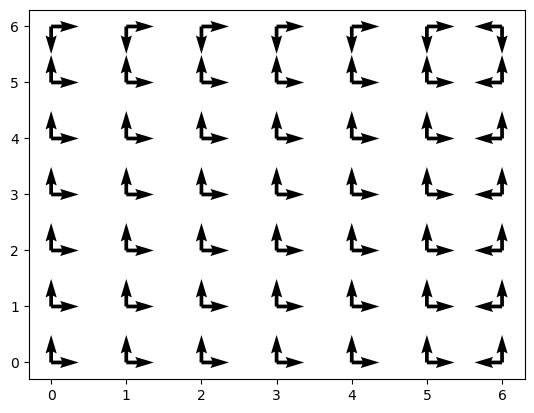

In [3]:
fig, ax = plt.subplots()
for i in range(0, n_nm):
    for j in range(0, n_nm):
        idx = coord2_to_idx(i,j,n_nm,bc='pbc')
        nb_idxs = np.where(h_nm[idx,:])[1]
        for nb_idx in nb_idxs:
            x,y = idx_to_coord2(nb_idx,n_nm)
            if x!=i or y!=j:
                ax.quiver(i,j,x-i,y-j)

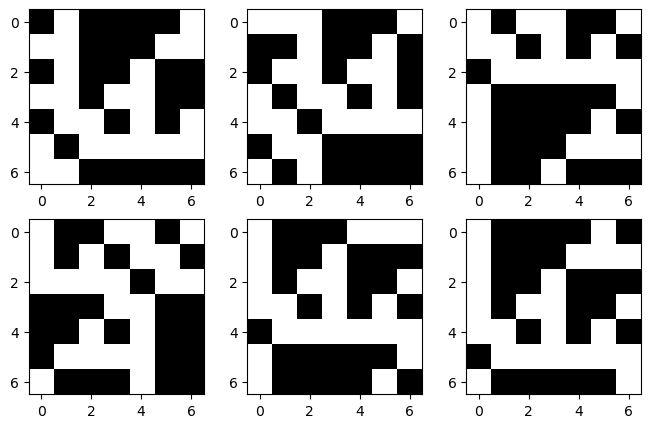

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(8,5))
for i in range(k):
    ax[i//3, i%3].imshow(l[i].reshape((n_nm, n_nm)), cmap='gray')

##### Effect of deletion

debug: ir =  0 current min_hamming_weight =  inf
[ 0  1  2  3  4  5  6  7  8 16 23 24 30 32 37 38 39 40 44 48 51 52 55 56
 58 60 62]
[n,k,d] = [64,1,27]
debug: ir =  0 current min_hamming_weight =  inf
[ 0  1  2  3  4  5  6  7  9 16 17 25 31 32 33 38 39 41 45 48 49 52 53 57
 59 61 63]
[n,k,d] = [64,1,27]
debug: ir =  0 current min_hamming_weight =  inf
[ 0  1  2  3  4  5  6  7 10 17 18 24 26 32 33 34 39 42 46 49 50 53 54 56
 58 60 62]
[n,k,d] = [64,1,27]
debug: ir =  0 current min_hamming_weight =  inf
[ 0  1  2  3  4  5  6  7 11 18 19 25 27 32 33 34 35 43 47 50 51 54 55 57
 59 61 63]
[n,k,d] = [64,1,27]
debug: ir =  0 current min_hamming_weight =  inf
[ 0  1  2  3  4  5  6  7 12 19 20 26 28 33 34 35 36 40 44 48 51 52 55 56
 58 60 62]
[n,k,d] = [64,1,27]
debug: ir =  0 current min_hamming_weight =  inf
[ 0  1  2  3  4  5  6  7 13 20 21 27 29 34 35 36 37 41 45 48 49 52 53 57
 59 61 63]
[n,k,d] = [64,1,27]
debug: ir =  0 current min_hamming_weight =  inf
[ 0  1  2  3  4  5  6  7 14 21 22

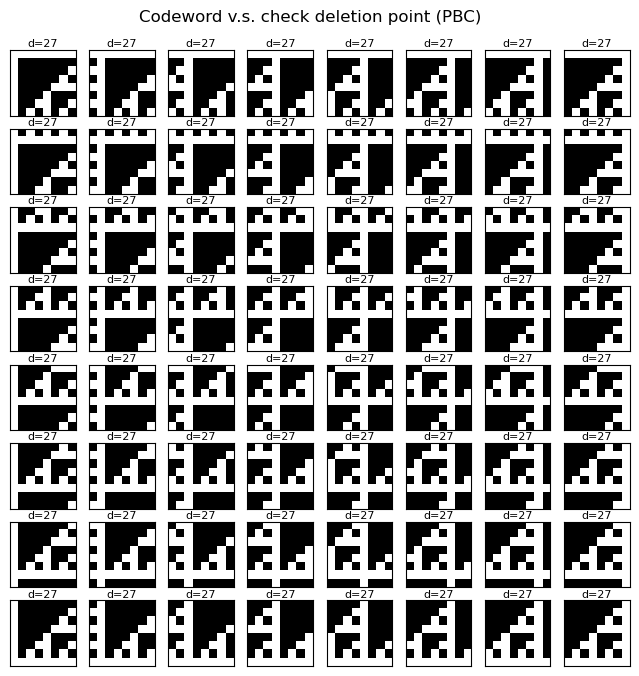

In [5]:
n_nm = 8
code_nm = np.array([1,1,0,1,0,0,0,0,0])
h_nm = gen_code_2d(code_nm, n_nm, bc='pbc')
h_nm = h_nm.todense()

fig, ax = plt.subplots(n_nm, n_nm, figsize=(8, 8))
for i in range(len(h_nm)):
    h_nm_del = h_nm.copy()
    h_nm_del[i] = 0
    k_del = len(nullspace(h_nm_del))
    d_del = get_classical_code_distance_time_limit(h_nm_del, 10)[1]
    print(f'[n,k,d] = [{len(h_nm)},{k_del},{d_del}]')
    l_nm = nullspace(h_nm_del)[0]
    l_nm = l_nm.reshape((n_nm, n_nm))
    ax[i//n_nm, i%n_nm].imshow(l_nm, cmap='gray')
    ax[i//n_nm, i%n_nm].set_title(f'd={d_del}', fontsize=8, pad=2)
    ax[i//n_nm, i%n_nm].set_xticks([])
    ax[i//n_nm, i%n_nm].set_yticks([])
fig.suptitle('Codeword v.s. check deletion point (PBC)', position=(0.5, 0.93))
plt.show()

##### The same, but for $H_2^\top$

In [6]:
n_nm = 7
code_nm = np.array([1,0,1,0,1,0,0,0,0])
h_nm = gen_code_2d(code_nm, n_nm, bc='pbc')
h_nm_T = h_nm.todense().transpose()
l = nullspace(h_nm_T)
k = len(l)
d = get_classical_code_distance_time_limit(h_nm_T, 10)[1]
print(f'[n,k,d] = [{len(h_nm_T)},{k},{d}]')

debug: ir =  0 current min_hamming_weight =  inf
[ 1  6  7  8 12 13 15 18 21 22 24 25 29 30 32 34 35 37 38 39 40 41 42 43]
debug: ir =  1 current min_hamming_weight =  24
debug: ir =  2 current min_hamming_weight =  24
debug: ir =  3 current min_hamming_weight =  24
debug: ir =  4 current min_hamming_weight =  24
debug: ir =  5 current min_hamming_weight =  24
[n,k,d] = [49,6,24]


#### OBC
Here we numerically see that when both BCs are OBC, the dimension of codeword space is still 0.

debug: ir =  0 current min_hamming_weight =  inf
0
[n,k,d] = [64,1,1]
debug: ir =  0 current min_hamming_weight =  inf
[0 1]
[n,k,d] = [64,1,2]
debug: ir =  0 current min_hamming_weight =  inf
[0 1 2]
[n,k,d] = [64,1,3]
debug: ir =  0 current min_hamming_weight =  inf
[0 1 2 3]
[n,k,d] = [64,1,4]
debug: ir =  0 current min_hamming_weight =  inf
[0 1 2 3 4]
[n,k,d] = [64,1,5]
debug: ir =  0 current min_hamming_weight =  inf
[0 1 2 3 4 5]
[n,k,d] = [64,1,6]
debug: ir =  0 current min_hamming_weight =  inf
[0 1 2 3 4 5 6]
[n,k,d] = [64,1,7]
debug: ir =  0 current min_hamming_weight =  inf
[0 1 2 3 4 5 6 7]
[n,k,d] = [64,1,8]
debug: ir =  0 current min_hamming_weight =  inf
[0 8]
[n,k,d] = [64,1,2]
debug: ir =  0 current min_hamming_weight =  inf
[1 8 9]
[n,k,d] = [64,1,3]
debug: ir =  0 current min_hamming_weight =  inf
[ 0  2  8  9 10]
[n,k,d] = [64,1,5]
debug: ir =  0 current min_hamming_weight =  inf
[ 1  3  8  9 10 11]
[n,k,d] = [64,1,6]
debug: ir =  0 current min_hamming_weight =  in

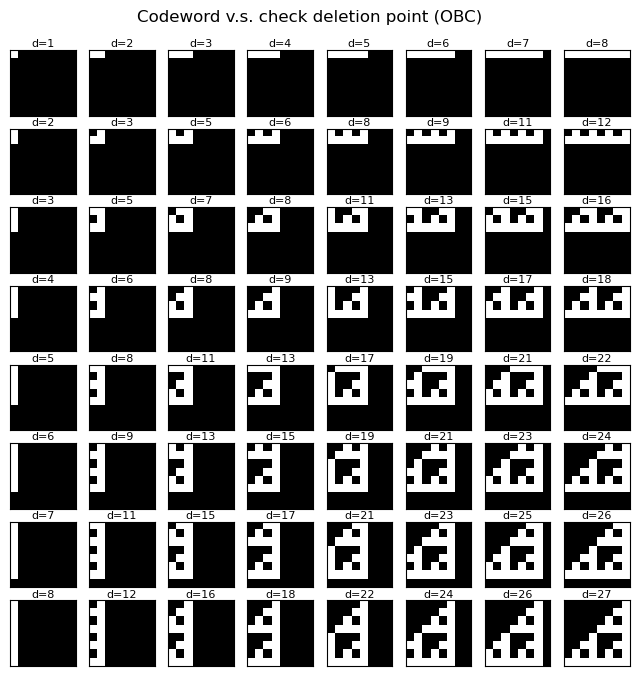

In [7]:
n_nm = 8
code_nm = np.array([1,1,0,1,0,0,0,0,0])
h_nm = gen_code_2d(code_nm, n_nm, bc='obc')
h_nm = h_nm.todense()

fig, ax = plt.subplots(n_nm, n_nm, figsize=(8, 8))
for i in range(len(h_nm)):
    h_nm_del = h_nm.copy()
    h_nm_del[i] = 0
    k_del = len(nullspace(h_nm_del))
    d_del = get_classical_code_distance_time_limit(h_nm_del, 10)[1]
    print(f'[n,k,d] = [{len(h_nm)},{k_del},{d_del}]')
    l_nm = nullspace(h_nm_del)[0]
    l_nm = l_nm.reshape((n_nm, n_nm))
    ax[i//n_nm, i%n_nm].imshow(l_nm, cmap='gray')
    ax[i//n_nm, i%n_nm].set_title(f'd={d_del}', fontsize=8, pad=2)
    ax[i//n_nm, i%n_nm].set_xticks([])
    ax[i//n_nm, i%n_nm].set_yticks([])
fig.suptitle('Codeword v.s. check deletion point (OBC)', position=(0.5, 0.93))
plt.show()

We can see that the last logical image for PBC and OBC are the same.

### Systematic deletion in HGP of Newman-Moore

In [8]:
def coord4_to_coord1_2(i, n):
    coord1, coord2 = i//(n**2), i%(n**2)
    coord1_x, coord1_y = coord1//n, coord1%n
    coord2_x, coord2_y = coord2//n, coord2%n
    return coord1_x, coord1_y, coord2_x, coord2_y

def coord1_2_to_coord4(x1, y1, x2, y2, n):
    coord1 = x1*n + y1
    coord2 = x2*n + y2
    return coord1*n**2 + coord2

#### (3,4) + (2,5) => dz=13, dx=76
Deleting one X stabilizer 

In [9]:
n = 7
code1 = np.array([1,1,0,1,0,0,0,0,0])
code2 = np.array([1,0,1,0,1,0,0,0,0])
# code2 = np.array([1,0,0,0,0,0,1,1,0])

h1 = gen_code_2d(code1, n)
h2 = gen_code_2d(code2, n)

hx, hz = gen_hgp(h1, h2)
hx = hx.todense()
hz = hz.todense()
hx_bak = hx.copy()
coord1 = (3, 4)
coord2 = (2, 5)
del_ind = coord1_2_to_coord4(*coord1, *coord2, n)
print(f'del_ind = {del_ind}')
hx[del_ind] = 0
lz = compute_lz(hx, hz)
lx = compute_lz(hz, hx)
k = len(lz)
print(f'k = {k}')
if k == 0:
    ls = []
    print(0)
if k == 1:
    ls = [lz[0], lx[0]]
    print(np.sum(ls[0]), np.sum(ls[1]))
elif k == 2:
    ls = [lz[0], lz[1], (lz[0]+lz[1])%2, lx[0], lx[1], (lx[0]+lx[1])%2]
    print(np.sum(ls[0]), np.sum(ls[1]), np.sum(ls[2]), np.sum(ls[3]), np.sum(ls[4]), np.sum(ls[5]))
d = min([np.sum(l) for l in ls])
print(f'd = {d}')

del_ind = 1244
k = 1
13.0 76.0
d = 13.0


Question: is the low Hamming weight of logical an inhirent problem of HGP?
If yes, then doom the 3D problem!
If no, what's the reason?

In HGP, $H_x=H_1\otimes I_{n_2} \oplus I_{m_1}\otimes H_2^\top$

$H_1 = 1 + x + y, H_2 = 1 - z - w$

Coordinate in 4D: $H_x(i,j) = H_1\otimes H_2 $

In [10]:
i = del_ind
coord1_x, coord1_y, coord2_x, coord2_y = coord4_to_coord1_2(i, n)

print(coord1_x, coord1_y, coord2_x, coord2_y)

pt1 = (coord1_x+1, coord1_y, coord2_x, coord2_y)
pt2 = (coord1_x, coord1_y+1, coord2_x, coord2_y)
pt3 = (coord1_x, coord1_y, coord2_x, coord2_y)
pt4 = (coord1_x, coord1_y, coord2_x+1, coord2_y)
pt5 = (coord1_x, coord1_y, coord2_x, coord2_y+1)

for ipt, pt in enumerate([pt1, pt2, pt3, pt4, pt5]):
    print(f'pt {ipt+1}: {pt}')

i1 = coord1_2_to_coord4(*pt1, n)
i2 = coord1_2_to_coord4(*pt2, n)
i3 = coord1_2_to_coord4(*pt3, n) + (2*n+1)**4
i4 = coord1_2_to_coord4(*pt4, n) + (2*n+1)**4
i5 = coord1_2_to_coord4(*pt5, n) + (2*n+1)**4

print(i1, i2, i3, i4, i5)

print(np.where(hx_bak[i] == 1))

print("======debug h2======")
print(f'anchor pt in h2: {coord2_x}, {coord2_y}')
print(f'neighbor pt indices in h2: {np.where(h2.todense().T[coord2_x*(2*n+1)+coord2_y] == 1)[1]}')
for ih2 in np.where(h2.todense().T[coord2_x*(2*n+1)+coord2_y] == 1)[1]:
    print(f'neighbor pt in h2: {ih2//(2*n+1)}, {ih2%(2*n+1)}')

3 4 2 5
pt 1: (4, 4, 2, 5)
pt 2: (3, 5, 2, 5)
pt 3: (3, 4, 2, 5)
pt 4: (3, 4, 3, 5)
pt 5: (3, 4, 2, 6)
1587 1293 51869 51876 51870
(array([0, 0, 0, 0, 0, 0]), array([1244, 1293, 1587, 3645, 3646, 3652]))
======debug h2======
anchor pt in h2: 2, 5
neighbor pt indices in h2: [35 36 42]
neighbor pt in h2: 2, 5
neighbor pt in h2: 2, 6
neighbor pt in h2: 2, 12


#### (6, 6) + ?? => d

In [11]:
n = 7
code1 = np.array([1,1,0,1,0,0,0,0,0])
code2 = np.array([1,0,1,0,1,0,0,0,0])
# code2 = np.array([1,0,0,0,0,0,1,1,0])

h1 = gen_code_2d(code1, n)
h2 = gen_code_2d(code2, n)

hx, hz = gen_hgp(h1, h2)
hx = hx.todense()
hz = hz.todense()
hx_bak = hx.copy()
coord1 = (6, 6)
coord2 = (6, 6)
del_ind = coord1_2_to_coord4(*coord1, *coord2, n)
print(f'del_ind = {del_ind}')
hx[del_ind] = 0
lz = compute_lz(hx, hz)
lx = compute_lz(hz, hx)
k = len(lz)
print(f'k = {k}')
if k == 0:
    ls = []
    print(0)
if k == 1:
    ls = [lz[0], lx[0]]
    print(np.sum(ls[0]), np.sum(ls[1]))
elif k == 2:
    ls = [lz[0], lz[1], (lz[0]+lz[1])%2, lx[0], lx[1], (lx[0]+lx[1])%2]
    print(np.sum(ls[0]), np.sum(ls[1]), np.sum(ls[2]), np.sum(ls[3]), np.sum(ls[4]), np.sum(ls[5]))
d = min([np.sum(l) for l in ls])
print(f'd = {d}')

del_ind = 2400
k = 1
25.0 12.0
d = 12.0


Observations:
* (6,6) + (0,0) => dz=25, dx=26
* (6,6) + (2,5) => dz=25, dx=26
* (6,6) + (6,6) => dz=25, dx=12

#### Rigorous study of HGP

$$H_X = H_1\otimes I_{m_2}\oplus I_{n_1}\otimes H_2^\top$$
$$L_X = \ker{H_1}\otimes (\mathbb{F}_2^{n_2}/ \mathrm{img}{H_2^\top})\oplus (\mathbb{F}_2^{m_1}/\mathrm{img}H_1) \otimes \ker{H_2^\top}$$
The part obtained by the complementary space $\mathbb{F}_2^{n_2}/ \mathrm{img}{H_2^\top}$ is not the meta-checks of classical code 2. Let's take a look at this space.

##### Study of the complement space

In [12]:
l = 7
bc = 'pbc'
code_nm = np.array([1,1,0,1,0,0,0,0,0])
h_nm = gen_code_2d(code_nm, l, bc=bc)
h_nm = h_nm.todense()

cw = nullspace(h_nm)
print(f'number of codewords: {len(cw)}')

cb = cplmtspace(h_nm)
assert len(cb) == l**2 - rank(h_nm)
print(f'number of meta-checks: {len(cb)}')
print(cb)

number of codewords: 6
number of meta-checks: 6
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [13]:
l = 7
bc = 'pbc'
code_lap = np.array([0,1,1,1,1,0,0,0,0])
h_lap = gen_code_2d(code_lap, l, bc=bc)
h_lap = h_lap.todense()

cw = nullspace(h_lap)
print(f'number of codewords: {len(cw)}')

cb = cplmtspace(h_lap)
assert len(cb) == l**2 - rank(h_lap)
print(f'number of meta-checks: {len(cb)}')
print(cb)

number of codewords: 13
number of meta-checks: 13
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0

My conclusion for the complement space is that it always contains weight-1 vector. Argument: the row space of H doesn't contain vectors that only involve only one qubit, so the weight-one vector always exists in the complement space (think about toric code).

##### HGP(Newman-Moore, Laplacian)

Now we know that the complement space contains weight-1 element for all classical codes, we can also see it from the behavior of logicals in HGP codes.

When we take HGP of two 2D classical codes, the logical in either sector is at most 2D within the 4D space.

In [14]:
l = 7
bc = 'pbc'
code_nm = np.array([1,1,0,1,0,0,0,0,0])
code_lap = np.array([0,1,1,1,1,0,0,0,0])
h_nm = gen_code_2d(code_nm, l, bc=bc)
h_lap = gen_code_2d(code_nm, l, bc=bc)

In [15]:
print(get_classical_code_distance_time_limit(h_nm.todense(), 10))
print(get_classical_code_distance_time_limit(h_lap.todense(), 10))

debug: ir =  0 current min_hamming_weight =  inf
[ 1  6  7  8 12 13 15 18 21 22 24 25 29 30 32 34 35 37 38 39 40 41 42 43]
debug: ir =  1 current min_hamming_weight =  24
debug: ir =  2 current min_hamming_weight =  24
debug: ir =  3 current min_hamming_weight =  24
debug: ir =  4 current min_hamming_weight =  24
debug: ir =  5 current min_hamming_weight =  24
(6, 24)
debug: ir =  0 current min_hamming_weight =  inf
[ 1  6  7  8 12 13 15 18 21 22 24 25 29 30 32 34 35 37 38 39 40 41 42 43]
debug: ir =  1 current min_hamming_weight =  24
debug: ir =  2 current min_hamming_weight =  24
debug: ir =  3 current min_hamming_weight =  24
debug: ir =  4 current min_hamming_weight =  24
debug: ir =  5 current min_hamming_weight =  24
(6, 24)


In [16]:
hx, hz = gen_hgp(h_nm, h_lap)
hx = hx.todense()
hz = hz.todense()
lz, lx = compute_lz(hx, hz), compute_lz(hz, hx)
k = len(lz)

if k == 0:
    print(f'[n,k,dz,dx] = [{len(hx)},{k},{np.inf},{np.inf}]')
else:
    print(f'[n,k,dz,dx] = [{len(hx)},{k},{min([np.sum(l) for l in lz])},{min([np.sum(l) for l in lx])}]')

[n,k,dz,dx] = [2401,72,24.0,24.0]


### Better stabilizer deletion in HGP of two 3D Newman-Moore codes

#### 3D classical anti-Laplacian

debug: ir =  0 current min_hamming_weight =  inf
[  0   2   3   5   6   9  11  13  14  15  17  18  19  21  23  25  29  30
  31  35  37  42  43  51  53  55  63  67  77  79  91  98  99 101 102 103
 105 109 119 126 127 133 147 149 151 161 175 197 198 199 203 205 210 211
 217 245 247 259 294 295 301]
[n,k,d] = [343,1,61]
debug: ir =  0 current min_hamming_weight =  inf
[  2   3   5   6   8  14  15  17  19  20  26  28  29  31  32  38  42  43
  44  50  64  66  68  80  92  98  99 101 103 104 106 108 110 120 126 127
 128 134 152 162 176 196 197 199 200 206 210 211 212 218 248 260 294 295
 296 302]
[n,k,d] = [343,1,56]
debug: ir =  0 current min_hamming_weight =  inf
[  0   1   7  11  13  17  18  20  21  23  27  28  30  32  33  35  39  43
  44  45  49  53  55  67  69  77  81  93 101 102 104 109 111 121 127 128
 129 135 147 149 153 163 177 196 198 200 201 203 207 211 212 213 219 245
 249 261 295 296 297 303]
[n,k,d] = [343,1,60]
debug: ir =  0 current min_hamming_weight =  inf
[  0   1   3   5  

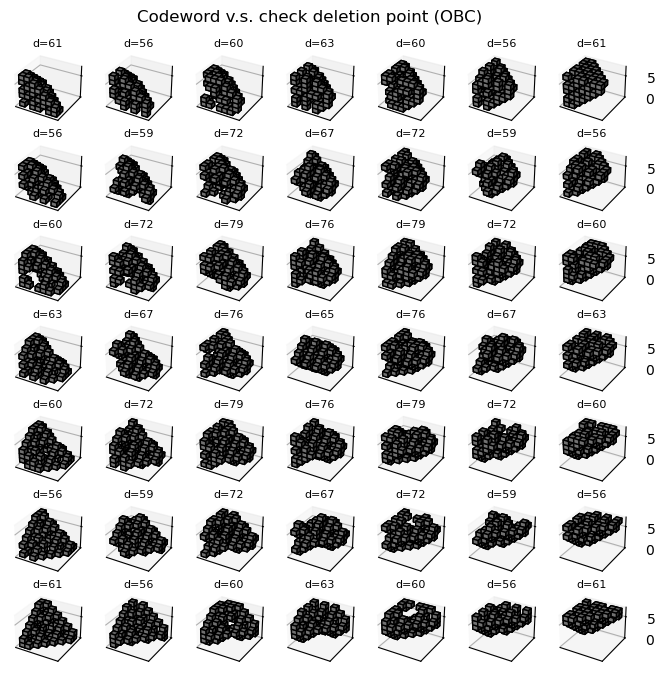

In [18]:
n = 3
l = 2*n+1
code_alap = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
h_alap = gen_code_3d(code_alap, n)
h_alap = h_alap.todense()

fig, ax = plt.subplots(l, l, figsize=(8, 8), subplot_kw=dict(projection='3d'))
for i in range(l**2):
    h_alap_del = h_alap.copy()
    h_alap_del[i] = 0
    k_del = len(nullspace(h_alap_del))
    d_del = get_classical_code_distance_time_limit(h_alap_del, 10)[1]
    print(f'[n,k,d] = [{len(h_alap)},{k_del},{d_del}]')
    l_alap = nullspace(h_alap_del)[0]
    l_alap = l_alap.reshape((l, l, l))
    ax[i//l, i%l].voxels(l_alap, facecolors='gray', edgecolors='k')
    ax[i//l, i%l].set_title(f'd={d_del}', fontsize=8, pad=2)
    ax[i//l, i%l].set_xticks([])
    ax[i//l, i%l].set_yticks([])
fig.suptitle('Codeword v.s. check deletion point (OBC)', position=(0.5, 0.93))
plt.show()

#### 3D classical anti-Newman-Moore

debug: ir =  0 current min_hamming_weight =  inf
[  0  49  98 147 196 245 294]
[n,k,d] = [343,1,7]
debug: ir =  0 current min_hamming_weight =  inf
[  0   1  50  98  99 148 196 197 246 294 295]
[n,k,d] = [343,1,11]
debug: ir =  0 current min_hamming_weight =  inf
[  1   2  49  51  98  99 100 149 197 198 245 247 294 295 296]
[n,k,d] = [343,1,15]
debug: ir =  0 current min_hamming_weight =  inf
[  2   3  50  52  98  99 100 101 150 198 199 246 248 294 295 296 297]
[n,k,d] = [343,1,17]
debug: ir =  0 current min_hamming_weight =  inf
[  3   4  51  53  99 100 101 102 147 151 196 199 200 245 247 249 294 295
 296 297 298]
[n,k,d] = [343,1,21]
debug: ir =  0 current min_hamming_weight =  inf
[  4   5  52  54 100 101 102 103 148 152 196 197 200 201 246 248 250 294
 295 296 297 298 299]
[n,k,d] = [343,1,23]
debug: ir =  0 current min_hamming_weight =  inf
[  5   6  53  55 101 102 103 104 149 153 197 198 201 202 245 247 249 251
 294 295 296 297 298 299 300]
[n,k,d] = [343,1,25]
debug: ir =  0 cur

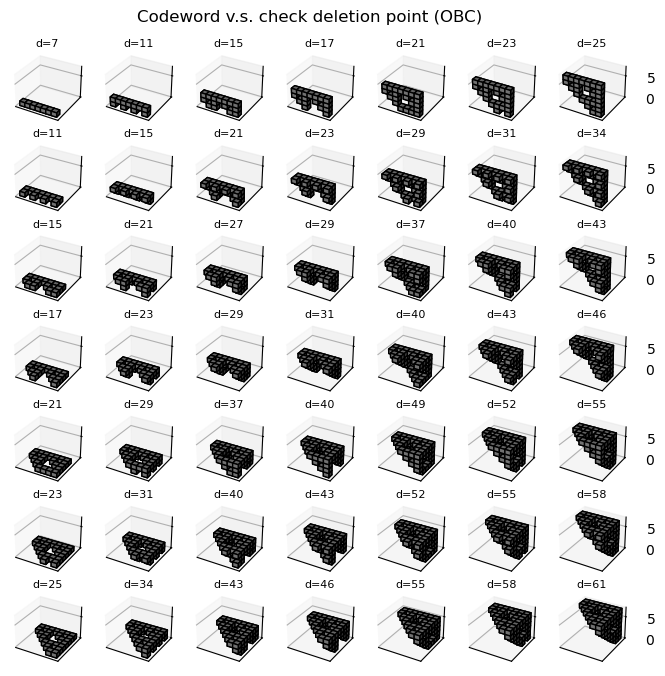

In [23]:
n = 3
l = 2*n+1
code_nm = np.array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
h_nm = gen_code_3d(code_nm, n)
h_nm = h_nm.todense()

fig, ax = plt.subplots(l, l, figsize=(8, 8), subplot_kw=dict(projection='3d'))
for i in range(l**2):
    h_nm_del = h_nm.copy()
    h_nm_del[l**3-l**2+i] = 0
    k_del = len(nullspace(h_nm_del))
    d_del = get_classical_code_distance_time_limit(h_nm_del, 10)[1]
    print(f'[n,k,d] = [{len(h_nm)},{k_del},{d_del}]')
    l_nm = nullspace(h_nm_del)[0]
    l_nm = l_nm.reshape((l, l, l))
    ax[i//l, i%l].voxels(l_nm, facecolors='gray', edgecolors='k')
    ax[i//l, i%l].set_title(f'd={d_del}', fontsize=8, pad=2)
    ax[i//l, i%l].set_xticks([])
    ax[i//l, i%l].set_yticks([])
fig.suptitle('Codeword v.s. check deletion point (OBC)', position=(0.5, 0.93))
plt.show()

The codewords shown above are the last $l^2$ ones.

#### Systematic stabilizer deletion

In [ ]:
def coord6_to_coord1_2(i, n):
    n_cl = (2*n+1)**3
    coord1, coord2 = i//n_cl, i%n_cl
    x1, y1, z1 = coord1//(2*n+1), coord1%(2*n+1)
    x2, y2, z2 = coord2//(2*n+1), coord2%(2*n+1)
    return x1, y1, z1, x2, y2, z2

def coord1_2_to_coord6(x1, y1, z1, x2, y2, z2, n):
    coord1 = x1*(2*n+1)**2 + y1*(2*n+1) + z1
    coord2 = x2*(2*n+1)**2 + y2*(2*n+1) + z2
    return coord1*(2*n+1)**3 + coord2

In [ ]:
n = 3
seed = 0
rng = np.random.default_rng(seed)
code1 = rng.binomial(27, 0.5, 27).astype(np.int32)
code2 = rng.binomial(27, 0.5, 27).astype(np.int32)
h1 = gen_code_3d(code1, n)
h2 = gen_code_3d(code2, n)
hx, hz = gen_hgp(h1, h2)
hx = hx.todense()
hz = hz.todense()
hx_bak = hx.copy()
coord1 = (1, 1, 1)
coord2 = (1, 1, 1)
del_ind = coord6_to_coord1_2(*coord1, *coord2, n)
print(f'del_ind = {del_ind}')
hx[del_ind] = 0
lz = compute_lz(hx, hz)
lx = compute_lz(hz, hx)
k = len(lz)
print(f'k = {k}')
if k == 0:
    ls = []
    print(0)
if k == 1:
    ls = [lz[0], lx[0]]
    print(np.sum(ls[0]), np.sum(ls[1]))
elif k == 2:
    ls = [lz[0], lz[1], (lz[0]+lz[1])%2, lx[0], lx[1], (lx[0]+lx[1])%2]
    print(np.sum(ls[0]), np.sum(ls[1]), np.sum(ls[2]), np.sum(ls[3]), np.sum(ls[4]), np.sum(ls[5]))
d = min([np.sum(l) for l in ls])
print(f'd = {d}')